In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./benchmark_results/benchmark_results_20241106_004321.csv")

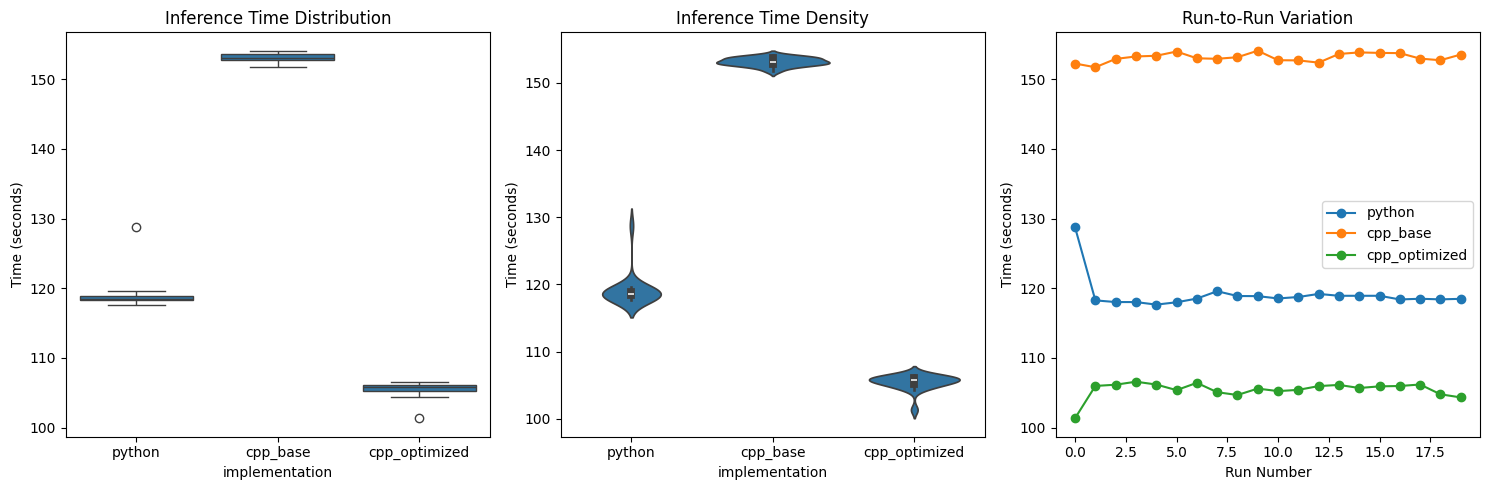

In [7]:
# Create figure with multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# 1. Boxplot
sns.boxplot(data=df, x="implementation", y="inference_time", ax=ax1)
ax1.set_title("Inference Time Distribution")
ax1.set_ylabel("Time (seconds)")

# 2. Violin plots
sns.violinplot(data=df, x="implementation", y="inference_time", ax=ax2)
ax2.set_title("Inference Time Density")
ax2.set_ylabel("Time (seconds)")

# 3. Line plot showing run-to-run variation
for impl in df["implementation"].unique():
    impl_data = df[df['implementation'] == impl]
    ax3.plot(impl_data['run_id'], impl_data['inference_time'],
             label = impl, marker = 'o')
ax3.set_title('Run-to-Run Variation')
ax3.set_xlabel('Run Number')
ax3.set_ylabel('Time (seconds)')
ax3.legend()

plt.tight_layout()
plt.show()

In [8]:
df.groupby('implementation')['inference_time'].describe()

,count,mean,std,min,25%,50%,75%,max
implementation,,,,,,,,
cpp_base,20.0,153.133149,0.624344,151.715243,152.725496,153.078488,153.652973,154.089741
cpp_optimized,20.0,105.460643,1.139380,101.358965,105.206553,105.811389,106.142937,106.595604
python,20.0,119.081549,2.319605,117.657489,118.366198,118.532917,118.924446,128.744884


In [9]:
df.groupby("implementation")["tokens_generated"].describe()

,count,mean,std,min,25%,50%,75%,max
implementation,,,,,,,,
cpp_base,20.0,512.0,0.0,512.0,512.0,512.0,512.0,512.0
cpp_optimized,20.0,512.0,0.0,512.0,512.0,512.0,512.0,512.0
python,20.0,506.0,0.0,506.0,506.0,506.0,506.0,506.0
